It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

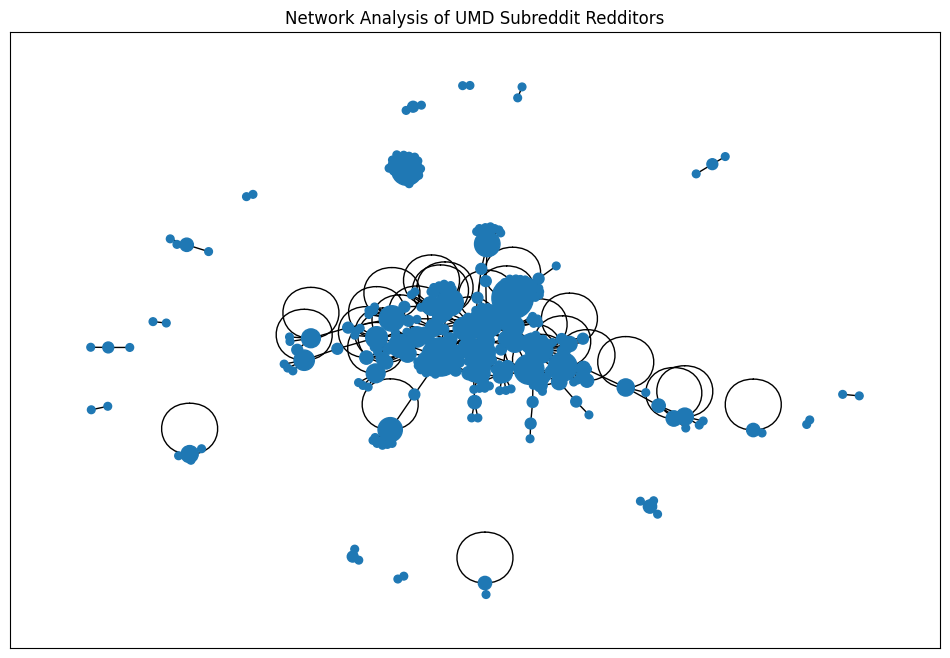

The most influential Redditor based on network connections is: PegasusTwelve
The most influential Redditor based on upvotes is: PegasusTwelve


In [11]:
import praw
import matplotlib.pyplot as plt
import networkx as nx
import nltk

# Initialize Reddit API
redditApi = praw.Reddit(client_id='DibdLZJ3B6JGnmuA92COCQ',
                        client_secret='PwZmPlwD2cgorErIsle7YEnxlnz01g',
                        user_agent='KingZed83')

subreddit = "UMD"
targetSub = redditApi.subreddit(subreddit)

# Extracting recent posts and comments
num_posts = 100
posts = targetSub.new(limit=num_posts)

# Graph initialization and upvote tracking
G = nx.Graph()
upvotes_by_redditor = {}

for post in posts:
    post_author = post.author.name if post.author else None
    if post_author:
        G.add_node(post_author)
        upvotes_by_redditor[post_author] = upvotes_by_redditor.get(post_author, 0) + post.score

    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        comment_author = comment.author.name if comment.author else None
        if comment_author:
            G.add_node(comment_author)
            G.add_edge(post_author, comment_author)
            upvotes_by_redditor[comment_author] = upvotes_by_redditor.get(comment_author, 0) + comment.score

# Network Influence: Most influential based on connections
degree_centrality = nx.degree_centrality(G)
most_influential_network = max(degree_centrality, key=degree_centrality.get, default="No users found")

# Upvote Influence: Most influential based on upvotes
most_influential_upvotes = max(upvotes_by_redditor, key=upvotes_by_redditor.get, default="No users found")

# Plotting the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=False, node_size=[v * 10000 for v in degree_centrality.values()])
plt.title('Network Analysis of UMD Subreddit Redditors')
plt.show()

# Displaying the most influential Redditors
print(f"The most influential Redditor based on network connections is: {most_influential_network}")
print(f"The most influential Redditor based on upvotes is: {most_influential_upvotes}")
